# &#x1F4D1; &nbsp; <span style="color:red"> Reflections. Artificial Intelligence for Robotics. Sections 12-14</span>

##   &#x1F916; &nbsp; <span style="color:red">Links</span>

Navigation and Metric Path Planning 

http://web.eecs.utk.edu/~leparker/Courses/CS594-fall08/Lectures/Oct-2-Path-Planning-I.pdf

http://web.eecs.utk.edu/~leparker/Courses/CS594-fall08/Lectures/Oct-7-Path-Planning-II.pdf

Dynamic Programming Algorithms for Planning and Robotics http://ramp.ensc.sfu.ca/fmmtutorial/slides/mitchell.pdf

Trajectory-Based Dynamic Programming http://www.cs.cmu.edu/~cga/papers/mombaur.pdf

Dynamic Programming & Greedy Method http://www.mysmu.edu/faculty/hclau/greedy-dp.pdf

Underactuated Robotics https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-832-underactuated-robotics-spring-2009/video-lectures/

Programming for Robotics (ROS) Course 1 https://www.youtube.com/watch?v=0BxVPCInS3M

Applied Motion Lab http://motion.cs.umn.edu/

##   &#x1F916; &nbsp; <span style="color:red">Libraries</span>

In [1]:
from math import *
import numpy as np
import pandas as pd
import random
import os
from time import time

In [2]:
from IPython.display import display, Image
import matplotlib.pylab as plt
import matplotlib.cm as cm
from matplotlib import offsetbox
%matplotlib inline

In [3]:
import skimage
from skimage import data, restoration, io
import networkx as nx

##   &#x1F916; &nbsp; <span style="color:red">Section 12. Search</span>

### Notes

**Path planning**: identifying a trajectory that will cause the robot to reach the goal location when executed.

*Basic Path Planning*
- Find the optimal path p(s) to a target (or from a source)
- Inputs
  - Cost c(x) to pass through each state in the state space
  - Set of targets or sources (provides boundary conditions)

*Techniques for metric path planning*:
- Configuration space
- Meadow maps
- Generalized Voronoi graphs
- Grids
- Quadtrees
- Graph-based planners: A*
- Wavefront-based planners

Two types of spatial representations commonly used in path planning:
- Qualitative (route):
  - Express space in terms of connections between landmarks
  - Dependent upon perspective of the robot
  - Orientation clues are egocentric
  - Usually cannot be used to generate quantitative (metric/layout) representations
- Quantitative (metric or layout):
  - Express space in terms of physical distances of travel
  - Bird’s eye view of the world
  - Not dependent upon the perspective of the robot
  - Independent of orientation and position of robot
  - Can be used to generate qualitative (route) representations

**A* Search Algorithm**
- Similar to breadth-first: at each point in the time the planner can only “see” its node and 1 set of nodes “in front”
- Idea is to rate the choices, choose the best one first, throw away any choices whenever you can:
  - f*(n) = g*(n) + h*(n) // ‘*’ means these are estimates
  - where:
    - f *(n) is the “goodness” of the path from Start to n
    - g*(n) is the “cost” of going from the Start to node n
    - h*(n) is the cost of going from n to the Goal – h is for “heuristic function”, because must have a way of guessing the cost of n to Goal since can’t see the path between n and the Goal
    
    
- Advantage:
  - Can be used with any Cspace representation that can be transformed into a graph
- Limitation:
  - Hard to use for path planning when there are factors to consider other than distance (e.g., rocky terrain, sand, etc.)

**Wavefront-Based Path Planners**
- Well-suited for grid representations
- General idea: consider Cspace to be conductive material with heat radiating out from initial node to goal node
- If there is a path, heat will eventually reach goal node
- Nice side effect: optimal path from all grid elements to the goal can be computed
- Result: map that looks like a potential field

**Dynamic programming** provides a way to find globally optimal control laws (policies), which give the appropriate action for any state. Dynamic programming takes as input a one step cost (a.k.a. “reward” or “loss”) function and the dynamics of the problem to be optimized. 

*Dynamic Programming Principle*

### $ϑ(x) = \min\limits_{y \in N(x)} [ϑ(y) + c(x)]$

- Value function ϑ(x) is “cost to go” from x to the nearest target
- Value ϑ(x) at a point x is the minimum over all points y in the neighborhood N(x) of the sum of
  - the value ϑ(y) at point y
  - the cost c(x) to travel through x
- Dynamic programming applies if
  - Costs are additive
  - Subsets of feasible paths are themselves feasible
  - Concatenations of feasible paths are feasible
- Compute solution by value iteration
  - Repeatedly solve DP equation until solution stops changing
  - In many situations, smart ordering reduces number of iterations

*Classes of Models for Dynamic Systems*

- Discrete time and state
- Continuous time / discrete state (Discrete event systems)
-  Discrete time / continuous state
-  Continuous time and state
- Markovian assumption
  - All information relevant to future evolution is captured in the state variable
  - Vital assumption, but failures are often treated as nondeterminism
- Deterministic assumption
  - Future evolution completely determined by initial conditions
  - Can be eased in many cases

Steps to Designing a Dynamic Programming Algorithm
1. Characterize optimal sub-structure
2. Recursively define the value of an optimal solution
3. Compute the value bottom up
4. (if needed) Construct an optimal solution S

**Smoothing** - the algorithm to generate smooth paths for actual Robot Motion. This will help the robot move smoothly and fast, rather than taking 90-degree turns within the grid cells and move really slowly around corners.

### Examples

In [5]:
matrix1 = [['o', 'c', 'u', 'r', 'l'],
           ['m', 'p', 'g', 'n', 'x'],
           ['e', 'i', 'h', 'y', 'o'],
           ['t', 'r', 'a', 'l', 'h'],
           ['v', 'h', 'y', 'o', 'j']]

def letter_positions(matrix):
    positions = {}
    for (y, row) in enumerate(matrix):
        for (x, letter) in enumerate(row):
             positions.setdefault(letter, []).append((x, y))
    return positions
    
letter_positions(matrix1)

{'a': [(2, 3)],
 'c': [(1, 0)],
 'e': [(0, 2)],
 'g': [(2, 1)],
 'h': [(2, 2), (4, 3), (1, 4)],
 'i': [(1, 2)],
 'j': [(4, 4)],
 'l': [(4, 0), (3, 3)],
 'm': [(0, 1)],
 'n': [(3, 1)],
 'o': [(0, 0), (4, 2), (3, 4)],
 'p': [(1, 1)],
 'r': [(3, 0), (1, 3)],
 't': [(0, 3)],
 'u': [(2, 0)],
 'v': [(0, 4)],
 'x': [(4, 1)],
 'y': [(3, 2), (2, 4)]}

In [6]:
def search(x, y):
    
    if grid[x][y] == 2:
        print ('found at %d,%d' % (x, y))
        return True
    elif grid[x][y] == 1:
        print ('wall at %d,%d' % (x, y))
        return False
    elif grid[x][y] == 3:
        print ('visited at %d,%d' % (x, y))
        return False
     
    print ('visiting %d,%d' % (x, y))

    grid[x][y] = 3

    if ((x < len(grid)-1 and search(x+1, y))

        or (y > 0 and search(x, y-1))

        or (x > 0 and search(x-1, y))

        or (y < len(grid)-1 and search(x, y+1))):

        return True

    return False

In [7]:
grid = [[0, 0, 0, 0, 0, 1],
        [1, 1, 0, 0, 0, 1],
        [0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 1],
        [0, 1, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 2]]

In [8]:
search(0,0)

visiting 0,0
wall at 1,0
visiting 0,1
wall at 1,1
visited at 0,0
visiting 0,2
visiting 1,2
visiting 2,2
wall at 3,2
visiting 2,1
wall at 3,1
visiting 2,0
visiting 3,0
visiting 4,0
visiting 5,0
visited at 4,0
wall at 5,1
visited at 3,0
wall at 4,1
visited at 2,0
wall at 3,1
wall at 1,0
visited at 2,1
wall at 1,1
visited at 2,2
visited at 1,2
wall at 2,3
wall at 1,1
visited at 0,2
visiting 1,3
wall at 2,3
visited at 1,2
visiting 0,3
visited at 1,3
visited at 0,2
visiting 0,4
visiting 1,4
visiting 2,4
visiting 3,4
wall at 4,4
visiting 3,3
visiting 4,3
visiting 5,3
visiting 5,2
wall at 5,1
visiting 4,2
visited at 5,2
wall at 4,1
wall at 3,2
visited at 4,3
visited at 5,3
visited at 4,3
visiting 5,4
visited at 5,3
wall at 4,4
found at 5,5


True

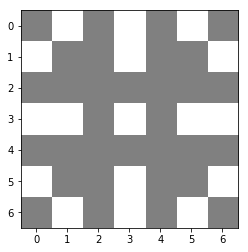

In [9]:
check = np.zeros((7, 7))
check[::3, 1::2] = 1
check[1::2, ::3] = 1
plt.imshow(check, cmap='gray', interpolation='nearest', alpha=0.5);

### Quizes

In [9]:
# Quiz: Compute Cost
# 7

In [10]:
# Quiz: Compute Cost 2
# 6

In [11]:
# Quiz: Optimal Path
# 15

In [12]:
# Quiz: Optimal Path 2
# 16

In [13]:
# Quiz: Maze
# 7

In [14]:
# Quiz: Maze 2
# 11

In [10]:
# Quiz: First Search Program
# ----------
# User Instructions:
# 
# Define a function, search() that returns a list
# in the form of [optimal path length, row, col]. For
# the grid shown below, your function should output
# [11, 4, 5].
#
# If there is no valid path from the start point
# to the goal, your function should return the string
# 'fail'
# ----------

# Grid format:
#   0 = Navigable space
#   1 = Occupied space

grid1 = [[0, 0, 1, 0, 0, 0],
         [0, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 1, 0],
         [0, 0, 1, 1, 1, 0],
         [0, 0, 0, 0, 1, 0]]
init1 = [0, 0]
goal1 = [len(grid1)-1, len(grid1[0])-1]
cost1 = 1

delta = [[-1, 0], # go up
         [ 0,-1], # go left
         [ 1, 0], # go down
         [ 0, 1]] # go right

delta_name = ['^', '<', 'v', '>']


def search(grid,init,goal,cost):
    # ----------------------------------------
    # insert code here
    # ----------------------------------------
    path = 'fail'
    way = [0, init[0], init[1]]
    ways = []
    
    while True:        
        if way[1] == goal[0] and way[2] == goal[1]:
            path = way
            break
            
        for direction in delta:
            new_way = [way[0] + cost, way[1] + direction[0], way[2] + direction[1]]
            
            if (new_way[1] > -1) & (new_way[1] < len(grid)) & (new_way[2] > -1) & (new_way[2] < len(grid[0])):
                if (grid[new_way[1]][new_way[2]] == 0):
                    ways.append(new_way)
                
        grid[way[1]][way[2]] = 3
        
        if len(ways) == 0:
            break
            
        ways.sort()

        way = ways[0]
#        print (way)
        ways.pop(0)
        
    return path

In [11]:
search(grid1,init1,goal1,cost1)

[11, 4, 5]

In [12]:
def search2(grid,init,goal,cost):
    # ----------------------------------------
    # insert code here
    # ----------------------------------------
    path = 'fail'
    way = [0, init[0], init[1], 'start']
    ways = []
    directions = []
    
    while True:        
        if way[1] == goal[0] and way[2] == goal[1]:
            path = way[:3]
            break
            
        for i in range(len(delta)):
            new_way = [way[0] + cost, way[1] + delta[i][0], way[2] + delta[i][1], delta_name[i]]
            
            if (new_way[1] > -1) & (new_way[1] < len(grid)) & (new_way[2] > -1) & (new_way[2] < len(grid[0])):
                if (grid[new_way[1]][new_way[2]] == 0):
                    ways.append(new_way)
                    
                
        grid[way[1]][way[2]] = 3
        
        if len(ways) == 0:
            break
            
        ways.sort()

        way = ways[0]
        
        directions.append([ways[0][0],ways[0][3]])
#        print (way)
        ways.pop(0)

    return path, directions

In [13]:
grid1 = [[0, 0, 1, 0, 0, 0],
         [0, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 1, 0],
         [0, 0, 1, 1, 1, 0],
         [0, 0, 0, 0, 1, 0]]
init1 = [0, 0]
goal1 = [len(grid1)-1, len(grid1[0])-1]
cost1 = 1
directions = search2(grid1,init1,goal1,cost1)[1]

In [14]:
print(directions)

[[1, '>'], [1, 'v'], [2, '>'], [2, 'v'], [2, 'v'], [3, '>'], [3, 'v'], [3, 'v'], [3, 'v'], [4, '>'], [4, '>'], [4, '>'], [4, '>'], [4, 'v'], [4, 'v'], [4, 'v'], [4, 'v'], [5, '>'], [5, '>'], [5, '>'], [5, '>'], [5, 'v'], [5, 'v'], [5, 'v'], [5, 'v'], [6, '^'], [6, '^'], [6, '^'], [6, '>'], [6, '>'], [6, '>'], [6, '>'], [6, '>'], [7, '^'], [7, '^'], [7, '^'], [7, '>'], [7, '>'], [7, '>'], [7, '>'], [7, '>'], [7, '>'], [7, '>'], [7, '>'], [8, '>'], [8, '>'], [8, '>'], [8, '^'], [8, '^'], [8, '^'], [8, '>'], [8, '>'], [8, '>'], [9, '>'], [9, '>'], [9, '>'], [9, '>'], [9, '>'], [9, '>'], [9, '^'], [9, '^'], [9, '^'], [9, 'v'], [9, 'v'], [9, 'v'], [10, 'v'], [10, 'v'], [10, 'v'], [11, 'v']]


In [15]:
values = set(map(lambda x:x[0], directions))
values
newlist = [[x, [y[1] for y in directions if y[0]==x]] for x in values]
newlist

[[1, ['>', 'v']],
 [2, ['>', 'v', 'v']],
 [3, ['>', 'v', 'v', 'v']],
 [4, ['>', '>', '>', '>', 'v', 'v', 'v', 'v']],
 [5, ['>', '>', '>', '>', 'v', 'v', 'v', 'v']],
 [6, ['^', '^', '^', '>', '>', '>', '>', '>']],
 [7, ['^', '^', '^', '>', '>', '>', '>', '>', '>', '>', '>']],
 [8, ['>', '>', '>', '^', '^', '^', '>', '>', '>']],
 [9, ['>', '>', '>', '>', '>', '>', '^', '^', '^', 'v', 'v', 'v']],
 [10, ['v', 'v', 'v']],
 [11, ['v']]]

In [16]:
# Quiz: Expansion Grid
# -----------
# User Instructions:
# 
# Modify the function search so that it returns
# a table of values called expand. This table
# will keep track of which step each node was
# expanded.
#
# Make sure that the initial cell in the grid 
# you return has the value 0.
# ----------

grid = [[0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 0]]
init = [0, 0]
goal = [len(grid)-1, len(grid[0])-1]
cost = 1

delta = [[-1, 0], # go up
         [ 0,-1], # go left
         [ 1, 0], # go down
         [ 0, 1]] # go right

delta_name = ['^', '<', 'v', '>']

def search3(grid,init,goal,cost):
    # ----------------------------------------
    # modify code below
    # ----------------------------------------
    closed = [[0 for row in range(len(grid[0]))] for col in range(len(grid))]
    closed[init[0]][init[1]] = 1

    x = init[0]
    y = init[1]
    g = 0

    open = [[g, x, y]]
    
    expand = [[-1 for i in range(len(grid[0]))] for j in range(len(grid))]
    count = 0
    
    found = False  # flag that is set when search is complete
    resign = False # flag set if we can't find expand
 
    while not found and not resign:
        if len(open) == 0:
            resign = True
        else:
            open.sort()
            open.reverse()
            next = open.pop()
            x = next[1]
            y = next[2]
            g = next[0]
            
            expand[x][y] = count
            count += 1
            
            if x == goal[0] and y == goal[1]:
                found = True
            else:
                for i in range(len(delta)):
                    x2 = x + delta[i][0]
                    y2 = y + delta[i][1]
                    if x2 >= 0 and x2 < len(grid) and y2 >=0 and y2 < len(grid[0]):
                        if closed[x2][y2] == 0 and grid[x2][y2] == 0:
                            g2 = g + cost
                            open.append([g2, x2, y2])
                            closed[x2][y2] = 1
    return expand

In [17]:
search3(grid,init,goal,cost)

[[0, 1, -1, 11, 15, 18],
 [2, 3, 5, 8, 12, 16],
 [4, 6, -1, 13, -1, 19],
 [7, 9, -1, 17, -1, 21],
 [10, 14, -1, 20, -1, 22]]

In [18]:
# Quiz: Print Path
# -----------
# User Instructions:
#
# Modify the the search function so that it returns
# a shortest path as follows:
# 
# [['>', 'v', ' ', ' ', ' ', ' '],
#  [' ', '>', '>', '>', '>', 'v'],
#  [' ', ' ', ' ', ' ', ' ', 'v'],
#  [' ', ' ', ' ', ' ', ' ', 'v'],
#  [' ', ' ', ' ', ' ', ' ', '*']]
#
# Where '>', '<', '^', and 'v' refer to right, left, 
# up, and down motions. Note that the 'v' should be 
# lowercase. '*' should mark the goal cell.
#
# You may assume that all test cases for this function
# will have a path from init to goal.
# ----------

grid = [[0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 0]]
init = [0, 0]
goal = [len(grid)-1, len(grid[0])-1]
cost = 1

delta = [[-1, 0 ], # go up
         [ 0, -1], # go left
         [ 1, 0 ], # go down
         [ 0, 1 ]] # go right

delta_name = ['^', '<', 'v', '>']

def search4(grid,init,goal,cost):
    # ----------------------------------------
    # modify code below
    # ----------------------------------------
    closed = [[0 for row in range(len(grid[0]))] for col in range(len(grid))]
    closed[init[0]][init[1]] = 1

    x = init[0]
    y = init[1]
    g = 0

    open = [[g, x, y]]

    found = False  # flag that is set when search is complete
    resign = False # flag set if we can't find expand

    result = [[-1 for i in range(len(grid[0]))] for j in range(len(grid))]
    count = 0
    
    while not found and not resign:
        if len(open) == 0:
            resign = True
            return 'fail'
        else:
            open.sort()
            open.reverse()
            next = open.pop()
            x = next[1]
            y = next[2]
            g = next[0]
            
            result[x][y] = count
            count += 1
            
            if x == goal[0] and y == goal[1]:
                found = True
            else:
                for i in range(len(delta)):
                    x2 = x + delta[i][0]
                    y2 = y + delta[i][1]
                    if x2 >= 0 and x2 < len(grid) and y2 >=0 and y2 < len(grid[0]):
                        if closed[x2][y2] == 0 and grid[x2][y2] == 0:
                            g2 = g + cost
                            open.append([g2, x2, y2])
                            closed[x2][y2] = 1
            
    edges = []
    for i in range(len(result)):
        for j in range(len(result[0])):
            if  result[i][j] == -1:
                continue
            else:
                next_elements = []

                for l in range(len(delta)):
                    i2, j2 = i + delta[l][0], j + delta[l][1]
                    if i2 >= 0 and i2 < len(result) and j2 >=0 and j2 < len(result[0]):
                        if result[i2][j2] > result[i][j]:
                            next_elements.append([result[i][j], result[i2][j2], delta_name[l]])
                                
            if next_elements != []:
                for el in next_elements:
                    edges.append(el)
                    
    edges.sort(key=lambda x: x[0], reverse=True)
    edges.sort(key=lambda y: y[1], reverse=True)
    path = [edges[0]]
    i=1
    while i < len(edges):    
        if edges[i][1] == path[-1][0]:
            path.append(edges[i])
        i+=1
        
    expand = [[' ' for row in range(len(grid[0]))] for col in range(len(grid))]
    expand[goal[0]][goal[1]]='*'
    
    positions = []
 
    def find(target, matrix):
        for i, row in enumerate(matrix):
            for j, el in enumerate(row):
                if el == target:
                    return [i, j]
        return (None, None)

    for element in path:
        position = find(element[0], result)
        expand[position[0]][position[1]]=element[2]
       
    return expand # make sure you return the shortest path

In [19]:
search4(grid,init,goal,cost)

[['v', ' ', ' ', ' ', ' ', ' '],
 ['>', '>', '>', '>', '>', 'v'],
 [' ', ' ', ' ', ' ', ' ', 'v'],
 [' ', ' ', ' ', ' ', ' ', 'v'],
 [' ', ' ', ' ', ' ', ' ', '*']]

In [20]:
# Quiz: Print Path
# -----------
# User Instructions:
#
# Modify the the search function so that it returns
# a shortest path as follows:
# 
# [['>', 'v', ' ', ' ', ' ', ' '],
#  [' ', '>', '>', '>', '>', 'v'],
#  [' ', ' ', ' ', ' ', ' ', 'v'],
#  [' ', ' ', ' ', ' ', ' ', 'v'],
#  [' ', ' ', ' ', ' ', ' ', '*']]
#
# Where '>', '<', '^', and 'v' refer to right, left, 
# up, and down motions. Note that the 'v' should be 
# lowercase. '*' should mark the goal cell.
#
# You may assume that all test cases for this function
# will have a path from init to goal.
# ----------

grid = [[0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 0]]
init = [0, 0]
goal = [len(grid)-1, len(grid[0])-1]
cost = 1

delta = [[-1, 0 ], # go up
         [ 0, -1], # go left
         [ 1, 0 ], # go down
         [ 0, 1 ]] # go right

delta_name = ['^', '<', 'v', '>']

def search5(grid,init,goal,cost):
    # ----------------------------------------
    # modify code below
    # ----------------------------------------
    closed = [[0 for row in range(len(grid[0]))] for col in range(len(grid))]
    closed[init[0]][init[1]] = 1

    x = init[0]
    y = init[1]
    g = 0

    open = [[g, x, y]]

    found = False  # flag that is set when search is complete
    resign = False # flag set if we can't find expand
    
    expand = [[' ' for col in range(len(grid[0]))] for row in range(len(grid))]
    
    class node:
        def __init__(self, x, y):
            self.children = [None,None,None,None]
            self.parent = None
            self.y = y
            self.x = x
            
        def coordinate_find(self,x,y):
            if self.x == x and self.y == y:
                return self
            else:
                for child in self.children:
                    if child != None:
                        if child.coordinate_find(x,y) != None:
                            return child.coordinate_find(x,y)
    
    init_node = node(x,y)
    next_node = init_node
  
    while not found and not resign:
        if len(open) == 0:
            resign = True
            return 'fail'
            
        else:
            open.sort()
            open.reverse()
            next = open.pop()
            x = next[1]
            y = next[2]
            g = next[0]
            
            next_node = init_node.coordinate_find(x,y)
            
            if x == goal[0] and y == goal[1]:
                found = True
                expand[x][y] = '*'
                while True:
                    parent_node = next_node.parent
                    for i in range(len(parent_node.children)):
                        if parent_node.children[i] == next_node:
                            expand[parent_node.x][parent_node.y] = delta_name[i]
                    if parent_node == init_node:
                        break
                    next_node = parent_node
            else:
                for i in range(len(delta)):
                    x2 = x + delta[i][0]
                    y2 = y + delta[i][1]
                    if x2 >= 0 and x2 < len(grid) and y2 >=0 and y2 < len(grid[0]):
                        if closed[x2][y2] == 0 and grid[x2][y2] == 0:
                            g2 = g + cost
                            open.append([g2, x2, y2])
                            next_node.children[i] = node(x2,y2)
                            child_node = next_node.children[i]
                            child_node.parent = next_node
                            closed[x2][y2] = 1             
       
    return expand # make sure you return the shortest path

In [21]:
search5(grid,init,goal,cost)

[['>', 'v', ' ', ' ', ' ', ' '],
 [' ', '>', '>', '>', '>', 'v'],
 [' ', ' ', ' ', ' ', ' ', 'v'],
 [' ', ' ', ' ', ' ', ' ', 'v'],
 [' ', ' ', ' ', ' ', ' ', '*']]

In [22]:
# Quiz: Implement A*
    
# -----------
# User Instructions:
#
# Modify the the search function so that it becomes
# an A* search algorithm as defined in the previous
# lectures.
#
# Your function should return the expanded grid
# which shows, for each element, the count when
# it was expanded or -1 if the element was never expanded.
# 
# If there is no path from init to goal,
# the function should return the string 'fail'
# ----------

grid = [[0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0]]
heuristic = [[9, 8, 7, 6, 5, 4],
             [8, 7, 6, 5, 4, 3],
             [7, 6, 5, 4, 3, 2],
             [6, 5, 4, 3, 2, 1],
             [5, 4, 3, 2, 1, 0]]

init = [0, 0]
goal = [len(grid)-1, len(grid[0])-1]
cost = 1

delta = [[-1, 0 ], # go up
         [ 0, -1], # go left
         [ 1, 0 ], # go down
         [ 0, 1 ]] # go right

delta_name = ['^', '<', 'v', '>']

def search6(grid,init,goal,cost,heuristic):
    # ----------------------------------------
    # modify the code below
    # ----------------------------------------
    closed = [[0 for col in range(len(grid[0]))] for row in range(len(grid))]
    closed[init[0]][init[1]] = 1

    expand = [[-1 for col in range(len(grid[0]))] for row in range(len(grid))]
#     action = [[-1 for col in range(len(grid[0]))] for row in range(len(grid))]

    x, y = init[0], init[1]
    g, step, count = 0, 0, 0

    open = [[step, g, x, y]]

    found = False  # flag that is set when search is complete
    resign = False # flag set if we can't find expand
    
    while not found and not resign:
        if len(open) == 0:
            resign = True
            return "Fail"
        else:
            open.sort(reverse=True)
            next_open = open.pop()
            
            x, y = next_open[2], next_open[3]
            step, g = next_open[0], next_open[1]

            expand[x][y] = count
            count += 1
            
            if x == goal[0] and y == goal[1]:
                found = True
            else:
                for i in range(len(delta)):
                    x2, y2 = x + delta[i][0], y + delta[i][1]
                    
                    if x2 >= 0 and x2 < len(grid) and y2 >=0 and y2 < len(grid[0]):
                        if closed[x2][y2] == 0 and grid[x2][y2] == 0:
                            g2 = g + cost
                            step2 = g2 + heuristic[x2][y2]
                            open.append([step2, g2, x2, y2])
                            closed[x2][y2] = 1

    return expand

In [23]:
search6(grid,init,goal,cost,heuristic)

[[0, -1, -1, -1, -1, -1],
 [1, -1, -1, -1, -1, -1],
 [2, -1, -1, -1, -1, -1],
 [3, -1, 8, 9, 10, 11],
 [4, 5, 6, 7, -1, 12]]

In [24]:
grid2 = [[0, 1, 0, 1, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0],
         [0, 1, 1, 0, 0, 0],
         [0, 1, 0, 0, 1, 0]]

search6(grid2,init,goal,cost,heuristic)

[[0, -1, -1, -1, -1, -1],
 [1, 2, 4, 6, 9, 11],
 [3, -1, 7, 10, 12, 14],
 [5, -1, -1, 13, 15, 17],
 [8, -1, -1, 16, -1, 18]]

In [25]:
heuristic2 = [[0 for col in range(len(grid2[0]))] for row in range(len(grid2))]
search6(grid2,init,goal,cost,heuristic2)

[[0, -1, 6, -1, 12, 16],
 [1, 2, 4, 7, 10, 13],
 [3, -1, 8, 11, 14, 17],
 [5, -1, -1, 15, 18, 20],
 [9, -1, 21, 19, -1, 22]]

In [26]:
# Quiz: Computing Value
# 15 (steps from the goal with values = 1)

In [27]:
# Quiz: Computing Value 2
# 3

In [28]:
# Quiz: Value Program
# ----------
# User Instructions:
# 
# Create a function compute_value which returns
# a grid of values. The value of a cell is the minimum
# number of moves required to get from the cell to the goal. 
#
# If a cell is a wall or it is impossible to reach the goal from a cell,
# assign that cell a value of 99.
# ----------

grid = [[0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0]]
goal = [len(grid)-1, len(grid[0])-1]

cost = 1 # the cost associated with moving from a cell to an adjacent one

delta = [[-1, 0 ], # go up
         [ 0, -1], # go left
         [ 1, 0 ], # go down
         [ 0, 1 ]] # go right

delta_name = ['^', '<', 'v', '>']

def accept(grid, x, y):
    if x >= 0 and x < len(grid) and y >= 0 and y < len(grid[0]):
        return True
    else:
        return False
    
def compute_value(grid,goal,cost):
    # ----------------------------------------
    # insert code below
    # ----------------------------------------
    
    # make sure your function returns a grid of values as 
    # demonstrated in the previous video.
    
    value = [[99 for x in range(len(grid[0]))] for y in range(len(grid))]
    value[goal[0]][goal[1]] = 0
    current_open = [[0, goal[0],goal[1]]]
    
    while len(current_open) != 0:
        current_open.sort()
        current_position = current_open.pop(0)
 
        for i in range(len(delta)):
            next_x, next_y = current_position[1] - delta[i][0], current_position[2] - delta[i][1]
 
            if accept(grid, next_x, next_y)==True:
                if (grid[next_x][next_y] == 0) and (value[next_x][next_y] == 99):
                
                    next_position = [current_position[0] + cost, next_x, next_y]                  
                    current_open.append(next_position)                   
                    value[next_x][next_y] = next_position[0]
            
    return value 

In [29]:
compute_value(grid,goal,cost)

[[11, 99, 7, 6, 5, 4],
 [10, 99, 6, 5, 4, 3],
 [9, 99, 5, 4, 3, 2],
 [8, 99, 4, 3, 2, 1],
 [7, 6, 5, 4, 99, 0]]

In [30]:
# Quiz: Optimum Policy

# ----------
# User Instructions:
# 
# Write a function optimum_policy that returns
# a grid which shows the optimum policy for robot
# motion. This means there should be an optimum
# direction associated with each navigable cell from
# which the goal can be reached.
# 
# Unnavigable cells as well as cells from which 
# the goal cannot be reached should have a string 
# containing a single space (' '), as shown in the 
# previous video. The goal cell should have '*'.
# ----------

init = [0, 0]
goal = [len(grid)-1, len(grid[0])-1]
cost = 1 # the cost associated with moving from a cell to an adjacent one

delta = [[-1, 0 ], # go up
         [ 0, -1], # go left
         [ 1, 0 ], # go down
         [ 0, 1 ]] # go right

delta_name = ['^', '<', 'v', '>']

def accept(grid, x, y):
    if x >= 0 and x < len(grid) and y >= 0 and y < len(grid[0]):
        return True
    else:
        return False

def optimum_policy(grid,goal,cost):
    # ----------------------------------------
    # modify code below
    # ----------------------------------------
    value = [[99 for col in range(len(grid[0]))] for row in range(len(grid))]
    policy = [[' ' for col in range(len(grid[0]))] for row in range(len(grid))]
    change = True

    while change:
        change = False

        for x in range(len(grid)):
            for y in range(len(grid[0])):
                if goal[0] == x and goal[1] == y:
                    if value[x][y] > 0:
                        value[x][y] = 0

                        change = True

                elif grid[x][y] == 0:
                    for a in range(len(delta)):
                        new_x, new_y = x + delta[a][0], y + delta[a][1]

                        if accept(grid, new_x, new_y) and grid[new_x][new_y] == 0:
                            new_value = value[new_x][new_y] + cost

                            if new_value < value[x][y]:
                                change = True
                                value[x][y] = new_value
            
                if value[x][y] == 99:
                    continue
                if value[x][y] == 0:
                    policy[x][y] = '*'
                    continue
                
                directions = len(delta)*[99]
                for a in range(len(delta)):
                    new_x, new_y = x + delta[a][0], y + delta[a][1]
                    if accept(grid, new_x, new_y):
                        directions[a] = value[new_x][new_y]
            
                for i in range(len(directions)):
                    if directions[i] == min(directions) and min(directions) != 99:
                        policy[x][y] = delta_name[i]
    return policy

In [31]:
grid = [[0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0]]
optimum_policy(grid,goal,cost)

[['v', ' ', '>', '>', '>', 'v'],
 ['v', ' ', '>', '>', '>', 'v'],
 ['v', ' ', '>', '>', '>', 'v'],
 ['v', ' ', '>', '>', '>', 'v'],
 ['>', '>', '>', '^', ' ', '*']]

In [35]:
grid = [[0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 0]]
optimum_policy(grid,goal,cost)

[['>', 'v', ' ', '>', '>', 'v'],
 ['>', '>', '>', '>', '>', 'v'],
 ['>', '^', ' ', '^', ' ', 'v'],
 ['>', '^', ' ', '^', ' ', 'v'],
 ['>', '^', ' ', '^', ' ', '*']]

In [36]:
# Quiz: Left Turn Policy
# ----------
# User Instructions:
# 
# Implement the function optimum_policy2D below.
#
# You are given a car in grid with initial state
# init. Your task is to compute and return the car's 
# optimal path to the position specified in goal; 
# the costs for each motion are as defined in cost.
#
# There are four motion directions: up, left, down, and right.
# Increasing the index in this array corresponds to making a
# a left turn, and decreasing the index corresponds to making a 
# right turn.

forward = [[-1,  0], # go up
           [ 0, -1], # go left
           [ 1,  0], # go down
           [ 0,  1]] # go right
forward_name = ['up', 'left', 'down', 'right']

# action has 3 values: right turn, no turn, left turn
action = [-1, 0, 1]
action_name = ['R', '#', 'L']

# EXAMPLE INPUTS:
# grid format:
#     0 = navigable space
#     1 = unnavigable space 
grid = [[1, 1, 1, 0, 0, 0],
        [1, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 1],
        [1, 1, 1, 0, 1, 1]]

init = [4, 3, 0] # given in the form [row,col,direction]
                 # direction = 0: up
                 #             1: left
                 #             2: down
                 #             3: right
                
goal = [2, 0] # given in the form [row,col]

cost = [2, 1, 20] # cost has 3 values, corresponding to making 
                  # a right turn, no turn, and a left turn

# EXAMPLE OUTPUT:
# calling optimum_policy2D with the given parameters should return 
# [[' ', ' ', ' ', 'R', '#', 'R'],
#  [' ', ' ', ' ', '#', ' ', '#'],
#  ['*', '#', '#', '#', '#', 'R'],
#  [' ', ' ', ' ', '#', ' ', ' '],
#  [' ', ' ', ' ', '#', ' ', ' ']]
# ----------

# ----------------------------------------
# modify code below
# ----------------------------------------
def accept2D(grid, x, y):
    if x >= 0 and x < len(grid[0]) and y >= 0 and y < len(grid) and grid[y][x] == 0:
        return True
    else:
        return False
    
def optimum_policy2D(grid,init,goal,cost):
    
    value = [[[1000 for i in range(len(forward))] for col in range(len(grid[0]))] for row in range(len(grid))]
    policy = [[[' ' for i in range(len(forward))] for col in range(len(grid[0]))] for row in range(len(grid))]
    policy2D = [[' ' for col in range(len(grid[0]))] for row in range(len(grid))]    
    
    change = True
    
    while change:
        change = False
        
        for x in range(len(grid[0])):
            for y in range(len(grid)):
                for i in range(len(forward)):
                    
                    if x == goal[1] and y == goal[0]:
                        if value[y][x][i] > 0:
                            value[y][x][i] = 0
                            policy[y][x][i] = '*'
                            change = True
                            
                    elif grid[y][x] == 0:
                        for j in range(len(forward)):
                            new_x, new_y = x + forward[j][1], y + forward[j][0]
                            
                            if accept2D(grid, new_x, new_y):
                                new_value = value[new_y][new_x][j]
                                
                                for a in range(len(action)):
                                    if (i + action[a]) % len(forward) == j:
                                        update_value = new_value + cost[a]
                                        
                                        if update_value < value[y][x][i]:
                                            value[y][x][i] = update_value
                                            policy[y][x][i] = action_name[a]
                                            change = True
                                            
    x, y, i = init[1], init[0], init[2]
    policy2D[y][x] = policy[y][x][i]
                                            
    while policy[y][x][i] != '*':
        if policy[y][x][i] == 'R':
            i = (i - 1) % 4
        elif policy[y][x][i] == 'L':
            i = (i + 1) % 4
            
        x += forward[i][1]
        y += forward[i][0]
        policy2D[y][x] = policy[y][x][i]        

    return policy2D

In [37]:
value = [[[1000 for i in range(len(forward))] for row in range(len(grid))] for col in range(len(grid[0]))]
value[5][4][3]

1000

In [38]:
optimum_policy2D(grid,init,goal,cost)

[[' ', ' ', ' ', 'R', '#', 'R'],
 [' ', ' ', ' ', '#', ' ', '#'],
 ['*', '#', '#', '#', '#', 'R'],
 [' ', ' ', ' ', '#', ' ', ' '],
 [' ', ' ', ' ', '#', ' ', ' ']]

In [39]:
grid = [[0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0]]
init = [1, 5, 0]
optimum_policy2D(grid,init,goal,cost)

[[' ', ' ', 'R', 'R', ' ', ' '],
 [' ', ' ', 'R', '#', '#', 'L'],
 ['*', ' ', ' ', '#', ' ', ' '],
 ['#', ' ', ' ', '#', ' ', ' '],
 ['R', '#', '#', 'R', ' ', ' ']]

In [40]:
grid = [[0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 0],
        [0, 1, 0, 0, 0, 1, 0],
        [0, 1, 0, 1, 0, 1, 0],
        [0, 1, 0, 1, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0]]
init = [0, 0, 3]
goal = [4, 2]
cost = [10, 40, 65]
optimum_policy2D(grid,init,goal,cost)

[['#', '#', '#', '#', '#', '#', 'R'],
 [' ', ' ', ' ', ' ', ' ', ' ', '#'],
 [' ', ' ', 'L', '#', 'L', ' ', '#'],
 [' ', ' ', '#', ' ', '#', ' ', '#'],
 [' ', ' ', '*', ' ', 'R', '#', 'R'],
 [' ', ' ', ' ', ' ', ' ', ' ', ' '],
 [' ', ' ', ' ', ' ', ' ', ' ', ' ']]

##   &#x1F916; &nbsp; <span style="color:red">Section 13. Problem Set 4</span>

In [41]:
# Quiz: Admissible Heuristic
# Yes

In [42]:
# Quiz: Admissible Heuristic 2
# No

In [43]:
# Quiz: Bad Heuristic
# A* may find a suboptimal path

In [44]:
# Quiz: Diagonal Motion
# 3   2   2
# 3   &   1
# 4   &   0

In [50]:
# Quiz: Stochastic Motion
# --------------
# USER INSTRUCTIONS
#
# Write a function called stochastic_value that 
# returns two grids. The first grid, value, should 
# contain the computed value of each cell as shown 
# in the video. The second grid, policy, should 
# contain the optimum policy for each cell.
#
# --------------
# GRADING NOTES
#
# We will be calling your stochastic_value function
# with several different grids and different values
# of success_prob, collision_cost, and cost_step.
# In order to be marked correct, your function must
# RETURN (it does not have to print) two grids,
# value and policy.
#
# When grading your value grid, we will compare the
# value of each cell with the true value according
# to this model. If your answer for each cell
# is sufficiently close to the correct answer
# (within 0.001), you will be marked as correct.

delta = [[-1, 0 ], # go up
         [ 0, -1], # go left
         [ 1, 0 ], # go down
         [ 0, 1 ]] # go right

delta_name = ['^', '<', 'v', '>'] # Use these when creating your policy grid.

# ---------------------------------------------
#  Modify the function stochastic_value below
# ---------------------------------------------

def accept2D(grid, x, y):
    if x >= 0 and x < len(grid[0]) and y >= 0 and y < len(grid) and grid[y][x] == 0:
        return True
    else:
        return False

def stochastic_value(grid,goal,cost_step,collision_cost,success_prob):
    failure_prob = (1.0 - success_prob)/2.0 # Probability(stepping left) = prob(stepping right) = failure_prob
    
    value = [[collision_cost*1.0 for col in range(len(grid[0]))] for row in range(len(grid))]
    policy = [[' ' for col in range(len(grid[0]))] for row in range(len(grid))]
    
    actions = [-1,0,1]

    change = True

    while change:
        change = False

        for y in range(len(grid)):
            for x in range(len(grid[0])):
                
                if goal[0] == y and goal[1] == x:
                    if value[y][x] > 0:
                        value[y][x], policy[y][x] = 0., '*'
                        change = True

                elif grid[y][x] == 0:
                    for i in range(len(delta)):
                        cost = 0.
                        for a in actions:
                            new_x, new_y, prob = x + delta[(i+a)%4][1], y + delta[(i+a)%4][0], 0.

                            if a == 0:
                                prob = success_prob
                            else:
                                prob = failure_prob
                                
                            if accept2D(grid, new_x, new_y):
                                cost += value[new_y][new_x] * prob
                            else:
                                cost += collision_cost * prob
                                
                        cost += cost_step
                        cost = round(cost,4)
                        
                        if cost < value[y][x]:
                            change = True
                            value[y][x] = cost
                            policy[y][x] = delta_name[i]
                               
    return value, policy

In [51]:
# ---------------------------------------------
#  Use the code below to test your solution
# ---------------------------------------------

grid = [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 1, 1, 0]]
goal = [0, len(grid[0])-1] # Goal is in top right corner
cost_step = 1
collision_cost = 100
success_prob = 0.5

value,policy = stochastic_value(grid,goal,cost_step,collision_cost,success_prob)
for row in value:
    print (row)
for row in policy:
    print (row)

# Expected outputs:
#
# [57.9029, 40.2784, 26.0665,  0.0000]
# [47.0547, 36.5722, 29.9937, 27.2698]
# [53.1715, 42.0228, 37.7755, 45.0916]
# [77.5858, 100.00, 100.00, 73.5458]
#
# ['>', 'v', 'v', '*']
# ['>', '>', '^', '<']
# ['>', '^', '^', '<']
# ['^', ' ', ' ', '^']

[57.9031, 40.2787, 26.0667, 0.0]
[47.055, 36.5725, 29.994, 27.27]
[53.1718, 42.0231, 37.7758, 45.0919]
[77.5859, 100.0, 100.0, 73.546]
['>', 'v', 'v', '*']
['>', '>', '^', '<']
['>', '^', '^', '<']
['^', ' ', ' ', '^']


In [52]:
grid = [[0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 0],
        [0, 1, 0, 0, 0, 1, 0],
        [0, 1, 0, 1, 0, 1, 0],
        [0, 1, 0, 1, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0]]
goal = [len(grid)-1, len(grid[0])-1]
value,policy = stochastic_value(grid,goal,cost_step,collision_cost,success_prob)
for row in value:
    print (row)
for row in policy:
    print (row)

[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 98.4286]
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 94.8571]
[100.0, 100.0, 100.0, 100.0, 98.2041, 100.0, 87.7143]
[100.0, 100.0, 100.0, 100.0, 94.4082, 87.7143, 73.4286]
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 51.0]
[100.0, 98.8125, 95.625, 89.25, 76.5, 51.0, 0.0]
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', 'v']
[' ', ' ', ' ', ' ', ' ', ' ', 'v']
[' ', ' ', ' ', ' ', 'v', ' ', 'v']
[' ', ' ', ' ', ' ', '>', '>', 'v']
[' ', ' ', ' ', ' ', ' ', ' ', 'v']
[' ', '>', '>', '>', '>', '>', '*']


##   &#x1F916; &nbsp; <span style="color:red">Section 14. Office Hours Week 4</span>